In [36]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [37]:
import pandas as pd
import os

def load_police_data():
    csv_path = os.path.join(os.path.join("police_data"), "crimes_2012_to_2017.csv")
    return pd.read_csv(csv_path, index_col=0)

In [38]:
police_data = load_police_data()

In [39]:
police_data.tail(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,False,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


In [40]:
police_data = police_data.drop(columns='Location')
police_data = police_data.drop(columns='ID')
police_data = police_data.drop(columns='Case Number')
police_data = police_data.drop(columns='Block')
police_data = police_data.drop(columns='Beat')
police_data = police_data.drop(columns='X Coordinate')
police_data = police_data.drop(columns='Y Coordinate')
police_data = police_data.drop(columns='Updated On')
police_data = police_data.drop(columns='Description')
police_data = police_data.drop(columns='Location Description')


In [41]:
# A lot (X50) faster when we provide the format
police_data['Date'] = pd.to_datetime(police_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

In [42]:
police_data.tail(2)

,Date,IUCR,Primary Type,Arrest,Domestic,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude
6253257,2016-05-03 21:07:00,0486,BATTERY,False,True,4.0,7.0,46.0,08B,2016,41.745252,-87.552773
6253474,2016-05-03 23:38:00,5007,OTHER OFFENSE,True,False,3.0,6.0,69.0,26,2016,41.758309,-87.620658


In [43]:
police_data= police_data.dropna()
police_data.shape

(1419591, 12)

In [44]:
# Set datetime as index, will not remove duplicates (verify_integrity=True would remove duplicates)
police_data = police_data.set_index('Date')
police_data.head(2)

,IUCR,Primary Type,Arrest,Domestic,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude
Date,,,,,,,,,,,
2016-05-03 23:40:00,0486,BATTERY,True,True,10.0,24.0,29.0,08B,2016,41.864073,-87.706819
2016-05-03 21:40:00,0486,BATTERY,False,True,3.0,20.0,42.0,08B,2016,41.782922,-87.604363


In [45]:
# Add columns with year, month, and weekday name
police_data['Year'] = police_data.index.year
police_data['Month'] = police_data.index.month
police_data['Day of the Year'] = police_data.index.day_of_year
police_data.head(1)


,IUCR,Primary Type,Arrest,Domestic,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Month,Day of the Year
Date,,,,,,,,,,,,,
2016-05-03 23:40:00,0486,BATTERY,True,True,10.0,24.0,29.0,08B,2016,41.864073,-87.706819,5,124


<AxesSubplot:xlabel='Date'>

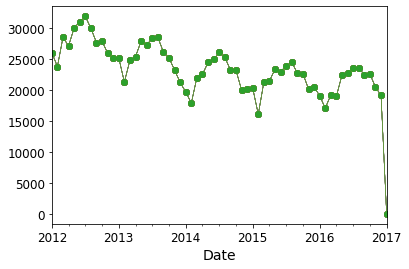

In [64]:
police_data.resample('1M').count().plot(marker = 'o', linestyle='-', linewidth=0.5, legend=False)